This file is for showing enhancing and knockout strategies.


In [4]:
from cobra import Reaction, Metabolite
from cobra.io import read_sbml_model
from cobra.io import write_sbml_model
import cameo
from cameo import phenotypic_phase_plane
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cameo.strain_design.heuristic.evolutionary_based import OptGene

In [5]:
from cameo import models
from cameo import load_model

In [6]:
opt_model = read_sbml_model('Models/model_VN_LB_vio-fad.xml')

In [7]:
print("Maximal growth rate of Vibrio natriegens in LB medium:", round(opt_model.optimize().objective_value, 3))

Maximal growth rate of Vibrio natriegens in LB medium: 2.841


Checking if the coeeficients would change anything on Violacein produciton rate

In [25]:
with opt_model:
    
    ratio = opt_model.problem.Constraint(
    1.9*opt_model.reactions.Violacein.flux_expression - 1*opt_model.reactions.Deoxyviolacein.flux_expression,
    lb=0, ub=0)
    opt_model.add_cons_vars(ratio)
    
    solution = opt_model.optimize()
    growth = solution.objective_value
    
    opt_model.objective = opt_model.reactions.Violacein
    solution = opt_model.optimize()
    
    print('Max. violacein production in LB media [mmol gDW^-1 h^-1]:', solution.fluxes['Violacein'])
    print('Max. deoxyviolacein production in LB media [mmol gDW^-1 h^-1]:', solution.fluxes['Deoxyviolacein'])
    print('Max. growth rate in LB media [h^-1]:', growth)
    opt_model.reactions.get_by_id("Protoviolaceinate_VioD").objective_coefficient = 1.0
    opt_model.reactions.get_by_id("Violaceinate").objective_coefficient = 1.0
    opt_model.reactions.get_by_id("Violacein").objective_coefficient = 1.0
    opt_model.reactions.get_by_id("Deoxyviolacein").objective_coefficient = 0.0
    opt_model.reactions.Growth.objective_coefficient = 0.0

    opt_model.objective = opt_model.reactions.Violacein
    solution = opt_model.optimize()
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Violacein')))
    print('Deoxyviolacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Deoxyviolacein')))
    print('Deoxyviolacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Deoxyviolaceinate_VioC')))
    print('Growth Rate (mmol/gdcw/h): ' + str(solution.fluxes.Growth))

Max. violacein production in LB media [mmol gDW^-1 h^-1]: 1.4705882352941175
Max. deoxyviolacein production in LB media [mmol gDW^-1 h^-1]: 2.7941176470588234
Max. growth rate in LB media [h^-1]: 1.4705882352941175
Violacein Production Rate (mmol/gdcw/h): 1.4705882352941175
Deoxyviolacein Production Rate (mmol/gdcw/h): 2.7941176470588234
Deoxyviolacein Production Rate (mmol/gdcw/h): 2.7941176470588234
Growth Rate (mmol/gdcw/h): 2.0292132049791523


In [10]:
with opt_model:
       
    solution = opt_model.optimize()
    growth = solution.objective_value
    
    
    opt_model.objective = opt_model.reactions.Violacein
    solution = opt_model.optimize()
    
    print('Max. violacein production in LB media [mmol gDW^-1 h^-1]:', solution.fluxes['Violacein'])
    print('Max. deoxyviolacein production in LB media [mmol gDW^-1 h^-1]:', solution.fluxes['Deoxyviolacein'])
    print('Max. growth rate in LB media [h^-1]:', growth)
    opt_model.reactions.get_by_id("Protoviolaceinate_VioD").objective_coefficient = 1.0
    opt_model.reactions.get_by_id("Violaceinate").objective_coefficient = 1.0
    opt_model.reactions.get_by_id("Violacein").objective_coefficient = 1.0
    opt_model.reactions.get_by_id("Deoxyviolacein").objective_coefficient = 0.0
    opt_model.reactions.Growth.objective_coefficient = 0.0

    opt_model.objective = opt_model.reactions.Violacein
    solution = opt_model.optimize()
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Violacein')))
    print('Deoxyviolacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Deoxyviolacein')))
    print('Deoxyviolacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Deoxyviolaceinate_VioC')))
    print('Growth Rate (mmol/gdcw/h): ' + str(solution.fluxes.Growth))

Max. violacein production in LB media [mmol gDW^-1 h^-1]: 3.333333333333333
Max. deoxyviolacein production in LB media [mmol gDW^-1 h^-1]: 0.0
Max. growth rate in LB media [h^-1]: 2.8405970205438855
Violacein Production Rate (mmol/gdcw/h): 3.333333333333333
Deoxyviolacein Production Rate (mmol/gdcw/h): 0.0
Deoxyviolacein Production Rate (mmol/gdcw/h): 0.0
Growth Rate (mmol/gdcw/h): 1.3999181682024042


By putting Violacein as the objective, the coefficients needed for the Violacein producton already set to 1.0. and to 0.0 for Deoxyviolacein production. 

FSEOF: 

In [11]:
from cameo.flux_analysis.analysis import phenotypic_phase_plane
from cameo.strain_design.deterministic import DifferentialFVA
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

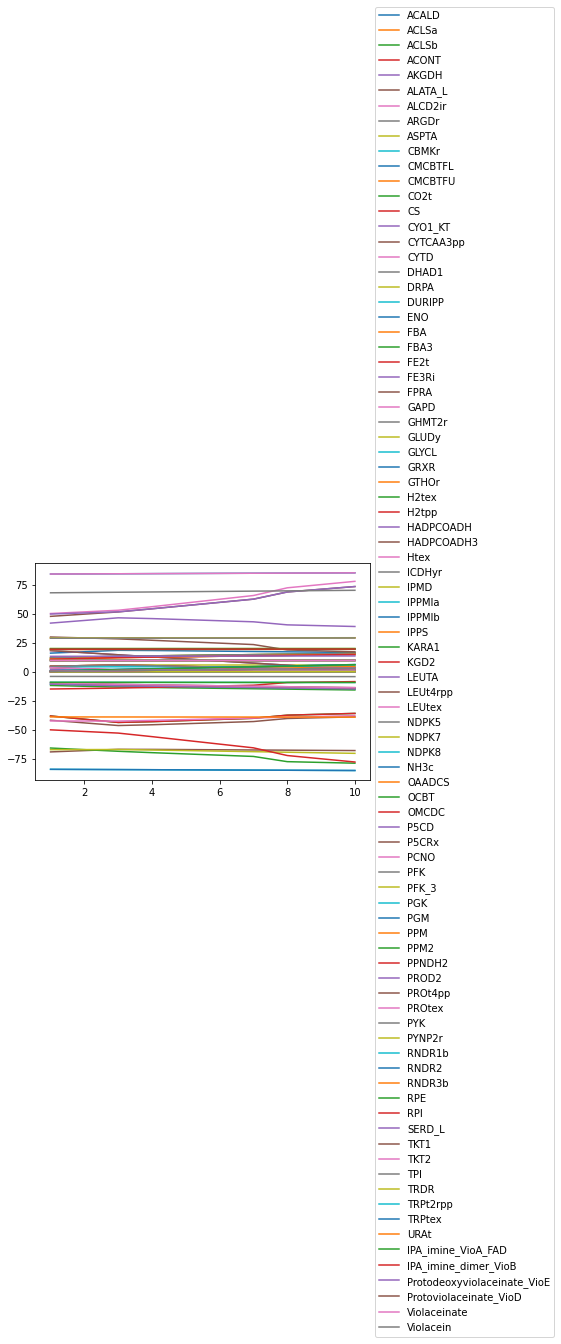

In [12]:
fseof = FSEOF(opt_model)
result_FSEOF = fseof.run(target = opt_model.reactions.Violacein)
df = result_FSEOF.data_frame
from matplotlib import pyplot as plt
result_FSEOF.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [13]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1
target_reactions_df = df[df['relative_change_in_flux'] > 1.09]
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
ACLSa,11.926201,12.602712,13.279223,13.662358,14.018175,14.373991,14.729808,15.085625,15.441441,15.797258,1.245046
ACLSb,11.926201,12.602712,13.279223,13.662358,14.018175,14.373991,14.729808,15.085625,15.441441,15.797258,1.245046
AKGDH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.709958,1.496005,1.282051,2.000000
ASPTA,4.708104,5.231099,5.754093,5.786765,5.773778,5.760792,5.747805,5.734819,5.721832,5.708845,1.175297
CMCBTFL,0.000000,0.000000,0.000000,0.038015,0.037200,0.036386,0.035571,0.034757,0.033942,0.033128,2.000000
CMCBTFU,0.000000,0.000000,0.000000,0.038015,0.037200,0.036386,0.035571,0.034757,0.033942,0.033128,2.000000
CO2t,-65.926062,-67.334512,-68.742963,-69.934947,-71.022035,-72.109124,-73.196212,-77.703217,-78.362398,-79.021579,1.165721
DHAD1,11.926201,12.602712,13.279223,13.662358,14.018175,14.373991,14.729808,15.085625,15.441441,15.797258,1.245046
FE3Ri,0.139128,0.289345,0.439562,0.608788,0.758600,0.908412,1.058223,1.208035,1.357847,1.507659,1.907719
IPMD,10.747726,11.447795,12.147865,12.554716,12.934262,13.313808,13.693355,14.072901,14.452447,14.831994,1.275369


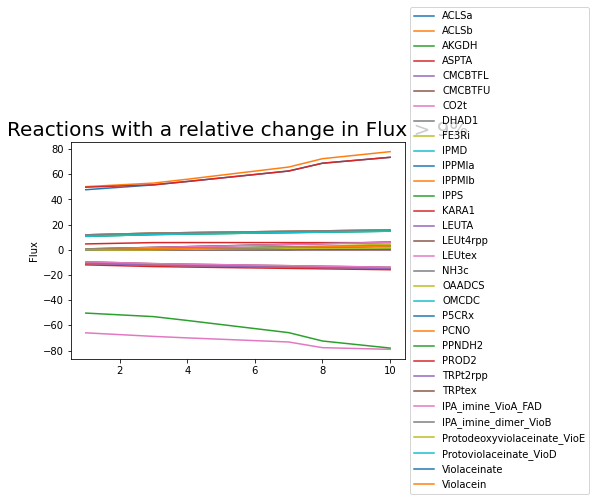

In [14]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)
fig = df.T.plot()
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 9%', size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [15]:
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
ACLSa,11.926201,12.602712,13.279223,13.662358,14.018175,14.373991,14.729808,15.085625,15.441441,15.797258,1.245046
ACLSb,11.926201,12.602712,13.279223,13.662358,14.018175,14.373991,14.729808,15.085625,15.441441,15.797258,1.245046
AKGDH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.709958,1.496005,1.282051,2.000000
ASPTA,4.708104,5.231099,5.754093,5.786765,5.773778,5.760792,5.747805,5.734819,5.721832,5.708845,1.175297
CMCBTFL,0.000000,0.000000,0.000000,0.038015,0.037200,0.036386,0.035571,0.034757,0.033942,0.033128,2.000000


The reactions ARGORNt7 and ARGDr might be good targets to overexpress.

One way to enhance Violacein produciton is to overexpress the reaction VioD catalyzes.

In [16]:
from IPython.core.display import Image, display
display(Image(url='Figures_report/figure3.png', width=300, unconfined=True))

In [23]:
opt_model.objective = opt_model.reactions.Violacein 
solution = opt_model.optimize()
solution.fluxes.Growth
solution.fluxes.Protoviolaceinate_VioD

3.333333333333333

In [27]:
with opt_model:
    opt_model.reactions.Protoviolaceinate_VioD.lower_bound = 3.33*2
    print(opt_model.reactions.Protoviolaceinate_VioD.lower_bound)
    opt_model.objective = opt_model.reactions.Violacein
    solution = opt_model.optimize()
    
    
    
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Violacein')))
    print('Deoxyviolacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Deoxyiolacein')))

6.66
Violacein Production Rate (mmol/gdcw/h): 3.333333333333333
Deoxyviolacein Production Rate (mmol/gdcw/h): None


By overexpressing the reaction catalyzed by VioD by a realistic amount, the produciton rate (20% and 100%) of Violacein does not enhance. Now, we additionally enhance the reaction catalyzed by VioC. The enzyme both catalyzes the last step of the produciton of Violacein and Deoxyviolacein. To simulate that we set the boundaries of both reactions. 

In [32]:
opt_model.objective = opt_model.reactions.Violacein 
solution = opt_model.optimize()
solution.fluxes.Growth
print(solution.fluxes.Violaceinate)
print(solution.fluxes.Deoxyviolaceinate_VioC)

3.333333333333333
0.0


In [34]:
with opt_model:
    opt_model.reactions.Protoviolaceinate_VioD.lower_bound = 3.33*2
    print(opt_model.reactions.Protoviolaceinate_VioD.lower_bound)
    opt_model.objective = opt_model.reactions.Violacein
    solution_1 = opt_model.optimize()
    
    opt_model.reactions.Violaceinate.lower_bound = 3.33*2
    opt_model.reactions.Deoxyviolaceinate_VioC.lower_bound = 0.0
    solution_2 = opt_model.optimize()
    
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution_1.fluxes.get('Violacein')))
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution_2.fluxes.get('Violacein')))



6.66
Violacein Production Rate (mmol/gdcw/h): 3.333333333333334
Violacein Production Rate (mmol/gdcw/h): 3.333333333333334


The model behaves differently then expected. By raising the lower boundary of reaction of VioD, the production balance of Violacein and Deoxyviolacein is supposed to be pushed towards Violacein. Then, by enhancing VioC, Violacein production is supposed to be enhanced even more. 
The model enhances Violacein production only a tiny amount when VioD is overexpressed.

When VioC reaction towards Deoxyviolacein is ignored, the model does not increase Violacein production. 

In [36]:
with opt_model:
    opt_model.reactions.Protoviolaceinate_VioD.lower_bound = 3.33*2
    print(opt_model.reactions.Protoviolaceinate_VioD.lower_bound)
    opt_model.objective = opt_model.reactions.Violacein
    solution_1 = opt_model.optimize()
    
    opt_model.reactions.Violaceinate.lower_bound = 3.33*2
    opt_model.reactions.Violacein.lower_bound = 3.33*2
    opt_model.reactions.Deoxyviolaceinate_VioC.lower_bound = 0
    solution_2 = opt_model.optimize()
    
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution_1.fluxes.get('Violacein')))
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution_2.fluxes.get('Violacein')))


6.66
Violacein Production Rate (mmol/gdcw/h): 3.333333333333334
Violacein Production Rate (mmol/gdcw/h): 3.333333333333334


To approach a more realistic model, we now add the Violacein / Deoxyviolacein ratio to the code.

In [40]:
  with opt_model:
    ratio = opt_model.problem.Constraint(
    1.9*opt_model.reactions.Violacein.flux_expression - 1*opt_model.reactions.Deoxyviolacein.flux_expression,
    lb=0, ub=0)
    opt_model.add_cons_vars(ratio)
    
    opt_model.objective = opt_model.reactions.Violacein
    start = opt_model.optimize()
    
    opt_model.reactions.Protoviolaceinate_VioD.lower_bound = 1.47*2
    print(opt_model.reactions.Protoviolaceinate_VioD.lower_bound)
    opt_model.objective = opt_model.reactions.Violacein
    solution = opt_model.optimize()
    
    
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(start.fluxes.get('Violacein')))
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Violacein')))
    print('Deoxyviolacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Deoxyiolacein')))
    
    
    


2.94
Violacein Production Rate (mmol/gdcw/h): 1.470588235294118
Violacein Production Rate (mmol/gdcw/h): 1.470588235294118
Deoxyviolacein Production Rate (mmol/gdcw/h): None


In [39]:
with opt_model:
    ratio = opt_model.problem.Constraint(
    1.9*opt_model.reactions.Violacein.flux_expression - 1*opt_model.reactions.Deoxyviolacein.flux_expression,
    lb=0, ub=0)
    opt_model.add_cons_vars(ratio)
    
    opt_model.objective = opt_model.reactions.Violacein 
    solution = opt_model.optimize()
    solution.fluxes.Growth
    print(solution.fluxes.Violaceinate)
    print(solution.fluxes.Deoxyviolaceinate_VioC)

1.470588235294118
2.7941176470588243


In [43]:
with opt_model:
    ratio = opt_model.problem.Constraint(
    1.9*opt_model.reactions.Violacein.flux_expression - 1*opt_model.reactions.Deoxyviolacein.flux_expression,
    lb=0, ub=0)
    opt_model.add_cons_vars(ratio)
    
    opt_model.objective = opt_model.reactions.Violacein
    start = opt_model.optimize()
    
    opt_model.reactions.Protoviolaceinate_VioD.lower_bound = 1.47*2
    print(opt_model.reactions.Protoviolaceinate_VioD.lower_bound)
    opt_model.objective = opt_model.reactions.Violacein
    solution_1 = opt_model.optimize()
    
    opt_model.reactions.Violaceinate.lower_bound = 1.47*2
    opt_model.reactions.Deoxyviolaceinate_VioC.lower_bound = 2.79*2
    solution_2 = opt_model.optimize()
    
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(start.fluxes.get('Violacein')))   
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution_1.fluxes.get('Violacein')))
    print('Deoxyviolacein Production Rate (mmol/gdcw/h): ' + str(start.fluxes.get('Deoxyviolacein')))
    print('Deoxyviolacein Production Rate (mmol/gdcw/h): ' + str(solution_2.fluxes.get('Deoxyviolacein')))



2.94
Violacein Production Rate (mmol/gdcw/h): 1.470588235294118
Violacein Production Rate (mmol/gdcw/h): 1.470588235294118
Deoxyviolacein Production Rate (mmol/gdcw/h): 2.7941176470588243
Deoxyviolacein Production Rate (mmol/gdcw/h): 2.7941176470588243


Implementing the ratio, overexpressing the different reactions does not enhance Violacein production. 

Another way to improve production or growth rates is to knock-out "unnecessary" pathways.

In [ ]:
plotter = PlotlyPlotter()

In [ ]:
wt_solution = opt_model.optimize()
growth = wt_solution.fluxes.Growth
Violacein_production = wt_solution.fluxes["Violacein"]
p = phenotypic_phase_plane(opt_model, variables=['Growth'], objective='Violacein')
p.plot(plotter,points=[(growth, Violacein_production)])

In [ ]:
optgene = OptGene(opt_model)

In [ ]:
result = optgene.run(target="Violacein",
                     biomass= "Growth" ,
                     substrate="glc__D_e",
                     max_evaluations=5000,
                     plot=False)

In [ ]:
result

This tells us that there are no pathways to knockout for optimization. The reason for that might be that not the full model is saved in carveme. Only about 32% of the exisitng coding genes in Vibri natrigens are saved in this model. As those are probably mainly the ones needed for growth, there are no "unnecessary" pathways that we can knock out for optimization.

In [ ]:
print("Percentage of genes included in the model compared to the number of existing coding genes in Vibrio natrigens(4513 genes):",round(((len(opt_model.genes)*100)/4513), 3),"%")

In [ ]:
result = optgene.run(target="Violacein",
                     biomass= "Growth" ,
                     substrate="EX_sucr_e",
                     max_evaluations=5000,
                     plot=False)

In [ ]:
result

Also by using another substrate, the model can not be optimized by knocking out pathways. 